In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # for data visualization purposes
import seaborn as sns # for statistical data visualization
%matplotlib inline

In [ ]:
df = pd.read_excel('/content/ST_B1_trim.xlsx')
df.head()

,TOTAL_AC,LAND_AC,TCAN_AC,TO_IA_AC,UTC_TO_PPA_AC,UTC_TO_UN_AC,UTC_UN_IA_AC,TempK
0,0.01,0.01,0.01,0.00,0.00,0.00,0.00,311.414188
1,0.10,0.10,0.10,0.00,0.00,0.00,0.00,311.395088
2,0.39,0.39,0.36,0.00,0.03,0.00,0.00,310.817430
3,1.05,1.05,0.92,0.00,0.12,0.00,0.00,311.449731
4,0.22,0.22,0.17,0.02,0.03,0.02,0.02,310.864694


In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137071 entries, 0 to 137070
Data columns (total 8 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   TOTAL_AC       137071 non-null  float64
 1   LAND_AC        137071 non-null  float64
 2   TCAN_AC        137071 non-null  float64
 3   TO_IA_AC       137071 non-null  float64
 4   UTC_TO_PPA_AC  137071 non-null  float64
 5   UTC_TO_UN_AC   137071 non-null  float64
 6   UTC_UN_IA_AC   137071 non-null  float64
 7   TempK          137026 non-null  float64
dtypes: float64(8)
memory usage: 8.4 MB


In [ ]:
df.describe()

,TOTAL_AC,LAND_AC,TCAN_AC,TO_IA_AC,UTC_TO_PPA_AC,UTC_TO_UN_AC,UTC_UN_IA_AC,TempK
count,137071.000000,137071.000000,137071.000000,137071.000000,137071.000000,137071.000000,137071.000000,137026.000000
mean,0.215755,0.212699,0.080192,0.089574,0.054803,0.077138,0.071965,315.215192
std,6.075417,5.906147,4.526958,1.211437,1.547693,1.003442,0.803212,2.457745
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,304.279811
25%,0.040000,0.040000,0.000000,0.020000,0.000000,0.020000,0.020000,313.755476
50%,0.060000,0.060000,0.010000,0.030000,0.010000,0.030000,0.030000,315.485867
75%,0.110000,0.110000,0.040000,0.040000,0.020000,0.040000,0.040000,316.979132
max,1731.160000,1716.160000,1558.870000,279.800000,313.050000,190.850000,182.580000,324.989871


In [ ]:
df.isnull().sum()

TOTAL_AC         0
LAND_AC          0
TCAN_AC          0
UTC_TO_PPA_AC    0
UTC_TO_UN_AC     0
UTC_UN_IA_AC     0
TempK            0
dtype: int64

In [ ]:
df.dropna(subset=['TempK'], inplace=True)

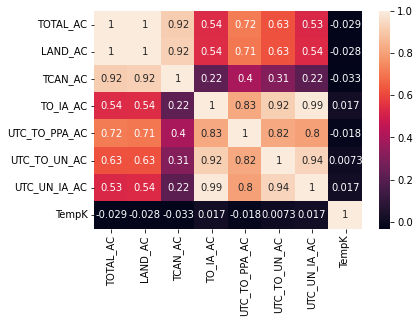

In [ ]:


# plt.matshow(df.corr())
correlation = df.corr()
heatmap = sns.heatmap(correlation, annot = True) 
plt.show()


In [ ]:
# Dropped the column with highest correlation
df.drop(df.columns[[3]], axis=1, inplace=True)

In [ ]:
X = df.drop(['TempK'], axis=1)

y = df['TempK']


In [ ]:
 from sklearn.model_selection import train_test_split
 x_train, x_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [ ]:
#import required packages
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)

    model.fit(x_train, y_train)  #fit the model
    pred=model.predict(x_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

RMSE value for k=  1 is: 2.4612631521157233
RMSE value for k=  2 is: 2.1269423613704466
RMSE value for k=  3 is: 2.0190041527937854
RMSE value for k=  4 is: 2.00422191230139
RMSE value for k=  5 is: 2.0046577102745617
RMSE value for k=  6 is: 1.9290011163639431
RMSE value for k=  7 is: 1.8802783496206779
RMSE value for k=  8 is: 1.8595384472083196
RMSE value for k=  9 is: 1.8607902232807658
RMSE value for k=  10 is: 1.8460504406580878
RMSE value for k=  11 is: 1.8452938470275775
RMSE value for k=  12 is: 1.8353166241859031
RMSE value for k=  13 is: 1.8300083488120378
RMSE value for k=  14 is: 1.8229771720524048
RMSE value for k=  15 is: 1.823837299318794
RMSE value for k=  16 is: 1.8243613532619487
RMSE value for k=  17 is: 1.8222149908644603
RMSE value for k=  18 is: 1.8198057819094744
RMSE value for k=  19 is: 1.8160334499291442
RMSE value for k=  20 is: 1.8137197843134683
RMSE value for k=  21 is: 1.8097803222264068
RMSE value for k=  22 is: 1.8058621352575854
RMSE value for k=  23 

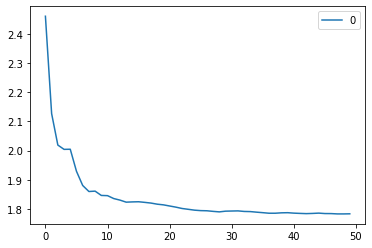

In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()

In [ ]:
model = neighbors.KNeighborsRegressor(n_neighbors = 17)

model.fit(x_train, y_train)  #fit the model
pred=model.predict(x_test) #make prediction on test set
error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
rmse_val.append(error) #store rmse values
print('RMSE value for k=  is:', error)

RMSE value for k=  is: 1.8222149908644603


In [ ]:
x_test.shape

,TOTAL_AC,LAND_AC,TCAN_AC,UTC_TO_PPA_AC,UTC_TO_UN_AC,UTC_UN_IA_AC
41952,0.04,0.04,0.01,0.00,0.03,0.03
135521,0.06,0.06,0.00,0.02,0.03,0.03
43428,0.17,0.17,0.08,0.05,0.05,0.05
116279,0.03,0.03,0.01,0.00,0.01,0.01
47705,0.01,0.01,0.01,0.00,0.00,0.00


In [ ]:
data = [[0.22,0.22,0.17,0.03,0.55,0.02]]
data = pd.DataFrame(data, columns=['TOTAL_AC','LAND_AC','TCAN_AC','UTC_TO_PPA_AC','UTC_TO_UN_AC','UTC_UN_IA_AC'])
pred1 = model.predict(data)
pred1

array([317.87073905])

In [ ]:
# Installing required libraries
!pip install tensorflow
!pip install keras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from keras.models import Sequential
from keras.layers import Dense
 


In [ ]:
# create ANN model
model = Sequential()
 
# Defining the Input layer and FIRST hidden layer, both are same!
model.add(Dense(units=5, input_dim=6, kernel_initializer='normal', activation='relu'))
 
# Defining the Second layer of the model
# after the first layer we don't have to specify input_dim as keras configure it automatically
model.add(Dense(units=5, kernel_initializer='normal', activation='tanh'))
 
# The output neuron is a single fully connected node 
# Since we will be predicting a single number
model.add(Dense(1, kernel_initializer='normal'))
 
# Compiling the model
model.compile(loss='mean_squared_error', optimizer='adam')
 


In [ ]:
# Fitting the ANN to the Training set
model.fit(x_train, y_train ,batch_size = 20, epochs = 20, verbose=1)

Epoch 1/20
4796/4796 [==============================] - 9s 2ms/step - loss: 25104.0645
Epoch 2/20
4796/4796 [==============================] - 8s 2ms/step - loss: 17117.2402
Epoch 3/20
4796/4796 [==============================] - 8s 2ms/step - loss: 10710.8223
Epoch 4/20
4796/4796 [==============================] - 8s 2ms/step - loss: 5864.6982
Epoch 5/20
4796/4796 [==============================] - 8s 2ms/step - loss: 2544.2437
Epoch 6/20
4796/4796 [==============================] - 8s 2ms/step - loss: 677.7299
Epoch 7/20
4796/4796 [==============================] - 8s 2ms/step - loss: 51.3988
Epoch 8/20
4796/4796 [==============================] - 8s 2ms/step - loss: 6.0525
Epoch 9/20
4796/4796 [==============================] - 8s 2ms/step - loss: 6.0493
Epoch 10/20
4796/4796 [==============================] - 8s 2ms/step - loss: 6.0486
Epoch 11/20
4796/4796 [==============================] - 8s 2ms/step - loss: 6.0492
Epoch 12/20
4796/4796 [==============================] - 8s 2ms/

In [ ]:
# Generating Predictions on testing data
Predictions=model.predict(x_test)

1285/1285 [==============================] - 2s 1ms/step


In [ ]:
error = sqrt(mean_squared_error(y_test,Predictions)) #calculate rmse
rmse_val.append(error) #store rmse values
print('RMSE value for k=  is:', error)

RMSE value for k=  is: 2.454522567852406
